# **Bioinformatics Project - Computational Drug Discovery**
# **Part 2**

**Author: Hubert Owusu**

This notebook focuses on calculating the PaDEL Descriptor Fingerprints of the molecular compounds, then using the descriptors to design a regression algorithm to predict the IC50 of drug compounds targeting the Replicase polyprotein 1ab

In [4]:
import pandas as pd
import numpy as np


In [2]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2024-10-02 07:40:22--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2024-10-02 07:40:22--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M   161MB/s    in 0.2s    

2024-10-02 07:40:23 (161 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2024-10-02 07:40:23--  https://github

In [3]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

In [5]:
df_final = pd.read_csv('Replicase_polyprotein_1ab_04_bioactivity_data_3class_pIC50.csv')

In [6]:
selection = ['canonical_smiles','molecule_chembl_id']
df_selection = df_final[selection]
df_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [6]:
! cat molecule.smi | head -5

Cc1c(OCC(F)(F)F)ccnc1C[S+]([O-])c1nc2ccccc2[nH]1	CHEMBL480
Cc1c(-c2cnccn2)ssc1=S	CHEMBL178459
O=c1sn(-c2cccc3ccccc23)c(=O)n1Cc1ccccc1	CHEMBL3545157
O=C(O[C@@H]1Cc2c(O)cc(O)cc2O[C@@H]1c1cc(O)c(O)c(O)c1)c1cc(O)c(O)c(O)c1	CHEMBL297453
O=C1C=Cc2cc(Br)ccc2C1=O	CHEMBL4303595


In [7]:
! cat molecule.smi | wc -l

1136


In [8]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [ ]:
! bash padel.sh

Processing CHEMBL480 in molecule.smi (1/1136). 
Processing CHEMBL178459 in molecule.smi (2/1136). 
Processing CHEMBL3545157 in molecule.smi (3/1136). Average speed: 2.44 s/mol.
Processing CHEMBL297453 in molecule.smi (4/1136). Average speed: 1.56 s/mol.
Processing CHEMBL4303595 in molecule.smi (5/1136). Average speed: 1.39 s/mol.
Processing CHEMBL444186 in molecule.smi (6/1136). Average speed: 1.14 s/mol.
Processing CHEMBL1886408 in molecule.smi (8/1136). Average speed: 0.89 s/mol.
Processing CHEMBL55400 in molecule.smi (7/1136). Average speed: 0.95 s/mol.
Processing CHEMBL505670 in molecule.smi (9/1136). Average speed: 0.82 s/mol.
Processing CHEMBL460499 in molecule.smi (10/1136). Average speed: 0.87 s/mol.
Processing CHEMBL1271993 in molecule.smi (11/1136). Average speed: 0.70 s/mol.
Processing CHEMBL3665060 in molecule.smi (12/1136). Average speed: 0.64 s/mol.
Processing CHEMBL1096979 in molecule.smi (13/1136). Average speed: 0.61 s/mol.
Processing CHEMBL164 in molecule.smi (14/1136

In [10]:
 ls -l

total 27428
-rw-r--r-- 1 root root  2030943 Oct  2 07:45 descriptors_output.csv
drwxr-xr-x 3 root root     4096 Oct  2 07:40 __MACOSX/
-rw-r--r-- 1 root root    88909 Oct  2 07:40 molecule.smi
drwxrwxr-x 4 root root     4096 May 30  2020 PaDEL-Descriptor/
-rw-r--r-- 1 root root      231 Oct  2 07:40 padel.sh
-rw-r--r-- 1 root root 25768637 Oct  2 07:40 padel.zip
-rw-r--r-- 1 root root   172719 Oct  2 07:40 Replicase_polyprotein_1ab_04_bioactivity_data_3class_pIC50.csv
drwxr-xr-x 1 root root     4096 Sep 30 13:24 sample_data/


### **Preparing X and Y Data For Machine Learning**

In [7]:
X = pd.read_csv('descriptors_output.csv')
X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL178459,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL480,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL3545157,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL297453,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL4303595,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131,CHEMBL5286307,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1132,CHEMBL5275584,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1133,CHEMBL5282079,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1134,CHEMBL5281103,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
X = X.drop(columns=['Name'])
X.head()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [9]:
y = df_final['pIC50']
y.head()

0    6.408935
1    6.677781
2    7.096910
3    5.801343
4    7.397940
Name: pIC50, dtype: float64

In [10]:
y.describe()

count    1136.000000
mean        5.992470
std         1.168985
min         3.371611
25%         5.118616
50%         6.073151
75%         6.744727
max        10.886057
Name: pIC50, dtype: float64

In [11]:
dataset3 = pd.concat([X,y], axis=1)
dataset3.head()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.408935
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.677781
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.096910
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.801343
4,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.397940


In [12]:
dataset3.to_csv('Replicase_polyprotein_1ab_05_bioactivity_data_3class_pIC50_pubchem_fp.csv', index=False)

# **Performing Machine Learning Analysis**

In [17]:
! pip install lazypredict

In [13]:
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV


In [14]:
X.shape, y.shape

((1136, 881), (1136,))

### **Removing features with low variance**

In [15]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_cut = selection.fit_transform(X)

In [16]:
X_cut.shape

(1136, 149)

### Saving the Selection 

In [17]:
import joblib

joblib.dump(selection, 'variance_threshold_model.pkl')

['variance_threshold_model.pkl']

### **Splitting Data Into Training And Testing Data**

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_cut, y, test_size=0.2)

In [16]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((908, 149), (908,), (228, 149), (228,))

## **Building a Regression Model using Random Forest**

Let's build a custom MSE function for our lazypredict model. This will allow us to evaluate the model based on the mean square error of the prediction.  

In [17]:
def custom_mse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred)

In [18]:
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=custom_mse)
models_train,predictions_train = clf.fit(X_train, X_train, y_train, y_train)
models_test,predictions_test = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 42/42 [00:10<00:00,  3.94it/s]


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000898 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 447
[LightGBM] [Info] Number of data points in the train set: 908, number of used features: 149
[LightGBM] [Info] Start training from score 5.993999
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 42/42 [00:09<00:00,  4.43it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001376 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 447
[LightGBM] [Info] Number of data points in the train set: 908, number of used features: 149
[LightGBM] [Info] Start training from score 5.993999
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [19]:
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken,custom_mse
Model,,,,,
HistGradientBoostingRegressor,-0.54,0.47,0.85,0.38,0.73
KNeighborsRegressor,-0.56,0.46,0.86,0.02,0.74
LGBMRegressor,-0.56,0.46,0.86,0.12,0.74
RandomForestRegressor,-0.57,0.46,0.86,1.11,0.74
GradientBoostingRegressor,-0.62,0.44,0.87,0.33,0.77
NuSVR,-0.64,0.44,0.88,0.10,0.77
SVR,-0.68,0.42,0.89,0.11,0.79
BaggingRegressor,-0.87,0.36,0.94,0.12,0.88
XGBRegressor,-0.89,0.35,0.94,0.13,0.89


## **Finetuning Our Best Predictor Model, RandomForestRegressor**

In [20]:
# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# RandomForestRegressor model
rf = RandomForestRegressor(random_state=42)

# RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf,
                                   param_distributions=param_grid,
                                   n_iter=100,  # Number of parameter settings sampled
                                   cv=3,        # 3-fold cross-validation
                                   verbose=2,
                                   random_state=42,
                                   n_jobs=-1)

In [21]:
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 500, 1000]},
                   random_state=42, verbose=2)

In [22]:
random_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_depth=10, max_features='sqrt',
                      min_samples_split=10, random_state=42)

In [23]:
y_pred = random_search.best_estimator_.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mse

0.7086670132149429

In [24]:
rmse = np.sqrt(mse)
rmse

0.8418236235785634

From the prediction, our finetuned RandomForestRegressor provides a low MSE of 0.71. Given that IC50 ranges from a minimum of 3.37 to 10.89, with a mean of 5.99, this suggests that an MSE of of 0.71 is pretty good, that the model is making relatively small errors on average in its predictions.

Also, a low RMSE score also suggests that on average, the model's predictions deviate from their actual values by about 0.84 units, which is relatively small.

#### Saving the model

In [30]:
import joblib

joblib.dump(random_search, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [26]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

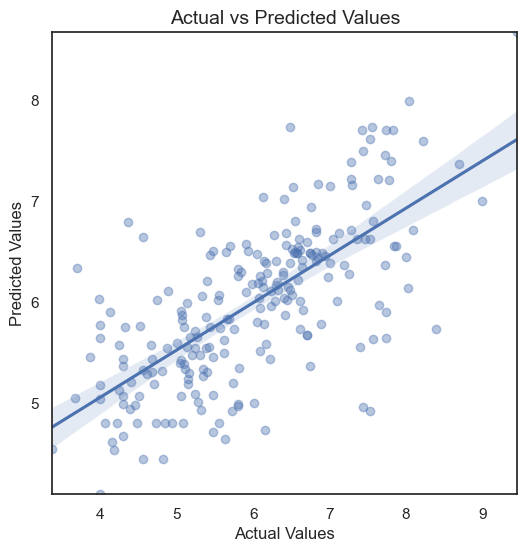

In [27]:
sns.set(color_codes=True)
sns.set_style("white")

plt.figure(figsize=(6, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.4})

plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.title('Actual vs Predicted Values', fontsize=14)
plt.xlim([min(y_test), max(y_test)])
plt.ylim([min(y_pred), max(y_pred)])


plt.show()

### **Residual Plot**
This plot shows the difference between predicted and actual values, helping us to identify whether the model's errors are random or if there's a pattern (which can indicate underfitting or overfitting).

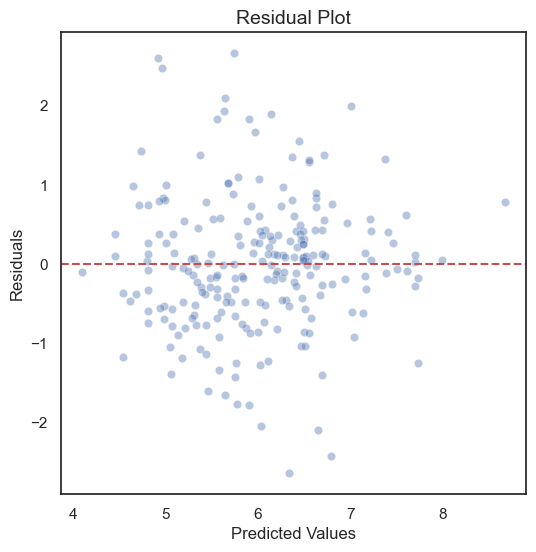

In [28]:
# Calculate residuals
residuals = y_test - y_pred

# Create a residual plot
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.4)

# Add a horizontal line at 0 to indicate no error
plt.axhline(y=0, color='r', linestyle='--')

# Labels and title
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.title('Residual Plot', fontsize=14)

plt.show()

### **Histogram of Residuals**
This graph is to help us analyze the distribution of errors ploting a histogram of the residuals. Ideally, the residuals should follow a normal distribution centered around zero.

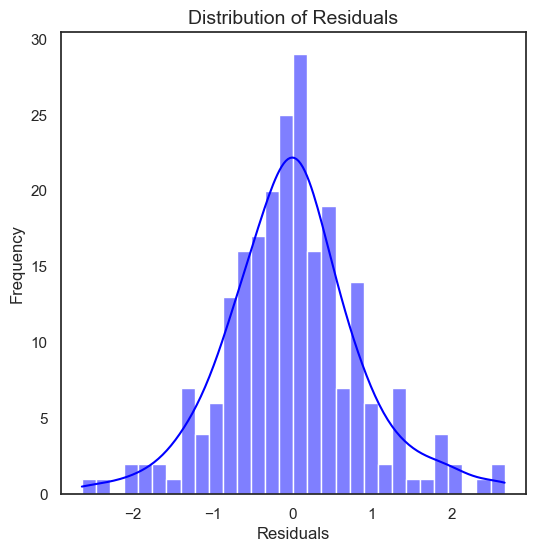

In [29]:
plt.figure(figsize=(6, 6))
sns.histplot(residuals, bins=30, kde=True, color='blue')

# Labels and title
plt.xlabel('Residuals', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Residuals', fontsize=14)

plt.show()